In [582]:
# Reading in the initial data
# Set the data column as the index
# Convert the temperature from fahrenheit to celsius

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
# Use 'test_predictions' for the error metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#import r2_score
from sklearn.metrics import r2_score

weather = pd.read_csv(r"cyprus weather historic.csv", index_col="DATE")

def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) / 1.8


In [583]:
# Convert the temperature columns
temp_columns = ['TAVG', 'TMAX', 'TMIN']

for col in temp_columns:
    weather[col] = weather[col].apply(fahrenheit_to_celsius)

In [584]:
# Print the first five rows of the DataFrame
weather.head()

STATION         NAME  PRCP  TAVG       TMAX      TMIN
DATE                                                                 
1976-04-04  CY000176090  LARNACA, CY   NaN   NaN  18.333333       NaN
1976-04-05  CY000176090  LARNACA, CY   NaN   NaN  20.555556  8.333333
1976-04-06  CY000176090  LARNACA, CY   NaN   NaN  20.000000  8.333333
1976-04-07  CY000176090  LARNACA, CY   NaN   NaN  20.555556  8.888889
1976-04-08  CY000176090  LARNACA, CY   NaN   NaN  21.666667  7.777778

In [585]:
# Print the summary statistics of the DataFrame
weather.describe()

PRCP          TAVG          TMAX          TMIN
count  143428.000000  17003.000000  76394.000000  76166.000000
mean        0.060960     19.885608     24.281910     12.725640
std         0.247344      6.222163      7.940429      6.379781
min         0.000000      3.333333     -5.000000    -10.000000
25%         0.000000     14.444444     18.333333      7.777778
50%         0.000000     20.000000     23.888889     12.222222
75%         0.000000     25.555556     30.555556     18.333333
max        10.200000     35.000000     45.555556     31.666667

In [586]:
# Group by date to exclude the location and apply multiple aggregation functions
weather = weather.groupby('DATE').agg({
    'PRCP': 'max',
    'TAVG': 'mean',
    'TMAX': 'max',
    'TMIN': 'min'
})

weather.head()

PRCP  TAVG       TMAX      TMIN
DATE                                       
1900-01-01   0.0   NaN  16.111111  1.666667
1900-01-02   0.0   NaN  15.555556  3.888889
1900-01-03   0.0   NaN  16.111111  3.333333
1900-01-04   0.0   NaN  17.777778  4.444444
1900-01-05   0.0   NaN  18.333333  4.444444

In [587]:
# Print the summary statistics of the DataFrame
weather.describe()

PRCP          TAVG          TMAX          TMIN
count  45041.000000  17003.000000  26416.000000  26235.000000
mean       0.127846     19.885608     26.925517     11.114605
std        0.382925      6.222163      7.599735      6.640178
min        0.000000      3.333333      4.444444    -10.000000
25%        0.000000     14.444444     20.000000      5.555556
50%        0.000000     20.000000     26.666667     11.111111
75%        0.040000     25.555556     33.888889     16.666667
max       10.200000     35.000000     45.555556     28.888889

In [588]:
# Print the index of the DataFrame
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45178 entries, 1900-01-01 to 2023-09-13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    45041 non-null  float64
 1   TAVG    17003 non-null  float64
 2   TMAX    26416 non-null  float64
 3   TMIN    26235 non-null  float64
dtypes: float64(4)
memory usage: 1.7+ MB


In [589]:
# Check the percentage of missing values in each column
weather.apply(pd.isnull).sum()/weather.shape[0]

PRCP    0.003032
TAVG    0.623644
TMAX    0.415291
TMIN    0.419297
dtype: float64

<Axes: xlabel='DATE'>

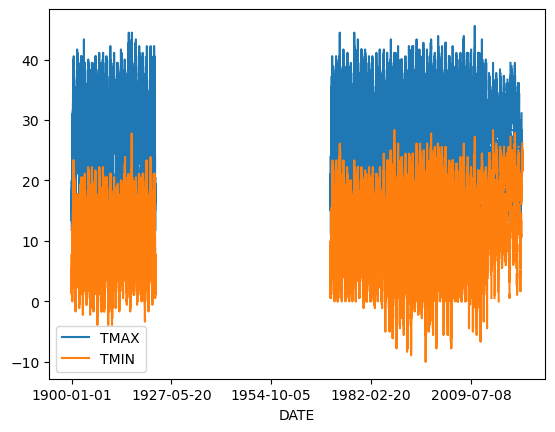

In [590]:
# See whats going on with the missing values
weather[["TMAX", "TMIN"]].plot()

In [591]:
#check for actual number of missing values
weather.apply(pd.isnull).sum()

PRCP      137
TAVG    28175
TMAX    18762
TMIN    18943
dtype: int64

In [592]:
# Check for special fields as specified in the data documentation
weather.apply(lambda x: (x==9999).sum())

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

In [593]:
# Replace the missing values with the median value for that variable
weather.fillna(weather.mean(), inplace=True)


In [594]:
# Check for missing values
weather.apply(pd.isnull).sum()

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

In [595]:
# Convert the index to datetime
weather.index = pd.to_datetime(weather.index)

In [596]:
weather.index

DatetimeIndex(['1900-01-01', '1900-01-02', '1900-01-03', '1900-01-04',
               '1900-01-05', '1900-01-06', '1900-01-07', '1900-01-08',
               '1900-01-09', '1900-01-10',
               ...
               '2023-09-04', '2023-09-05', '2023-09-06', '2023-09-07',
               '2023-09-08', '2023-09-09', '2023-09-10', '2023-09-11',
               '2023-09-12', '2023-09-13'],
              dtype='datetime64[ns]', name='DATE', length=45178, freq=None)

In [597]:
# Select dates after 1975 to avoid the large gap in missing values
weather = weather[(weather.index > '1975-01-01')]

<Axes: xlabel='DATE'>

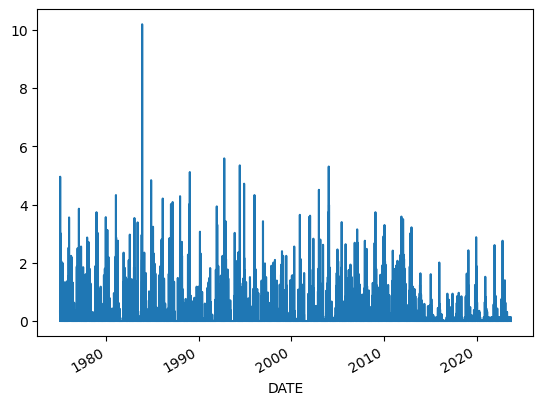

In [598]:
# Plot precipitation
weather["PRCP"].plot()

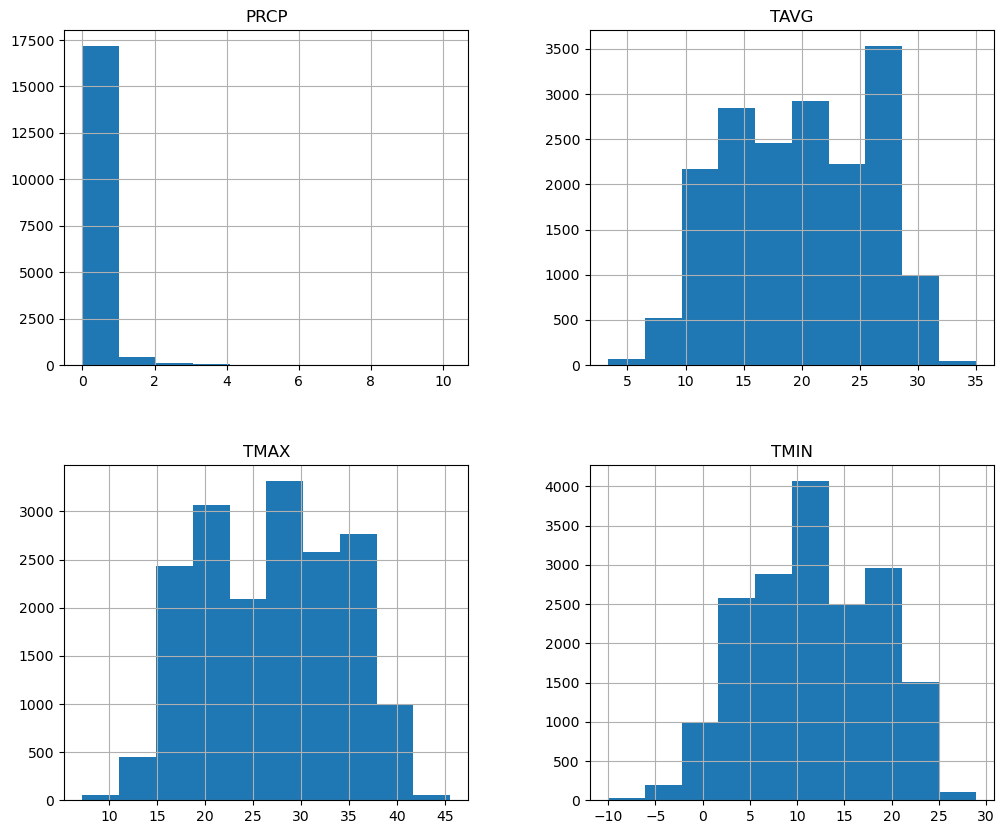

In [599]:
# Plot exploratory plots for all values
weather.hist(figsize=(12, 10))
plt.show()


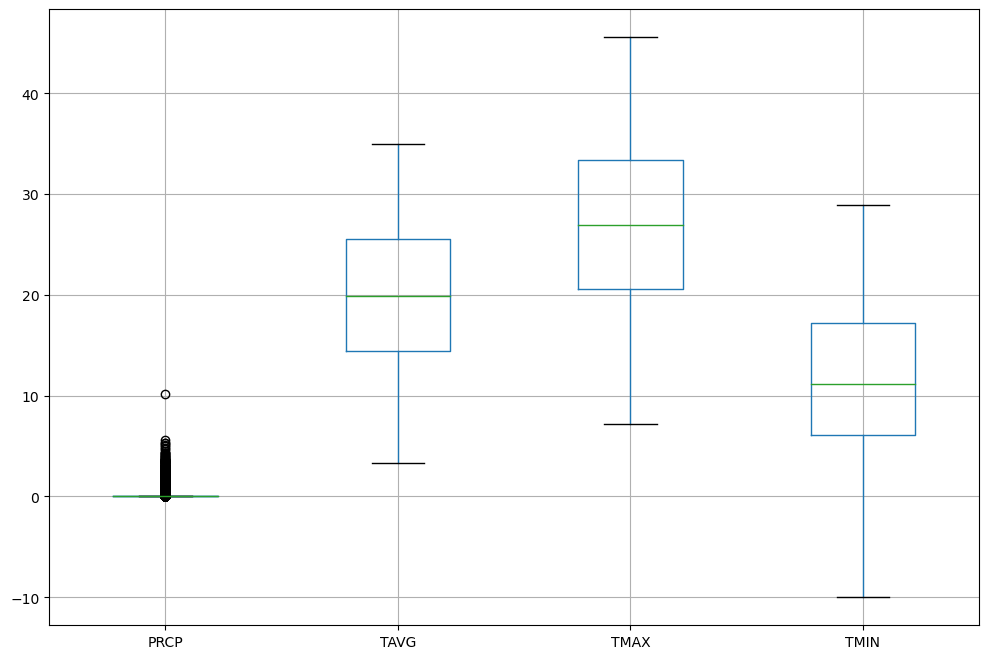

In [600]:
# Plot boxplots for all values
weather.boxplot(figsize=(12, 8))
plt.show()


In [601]:
# Check the summary statistics of the DataFrame now that we excluded and cleaned data
weather.describe()

PRCP          TAVG          TMAX          TMIN
count  17784.000000  17784.000000  17784.000000  17784.000000
mean       0.129074     19.885608     26.865075     11.424059
std        0.390063      6.083995      7.375092      6.771463
min        0.000000      3.333333      7.222222    -10.000000
25%        0.000000     14.444444     20.555556      6.111111
50%        0.000000     19.885608     26.925517     11.114605
75%        0.030000     25.555556     33.333333     17.222222
max       10.200000     35.000000     45.555556     28.888889

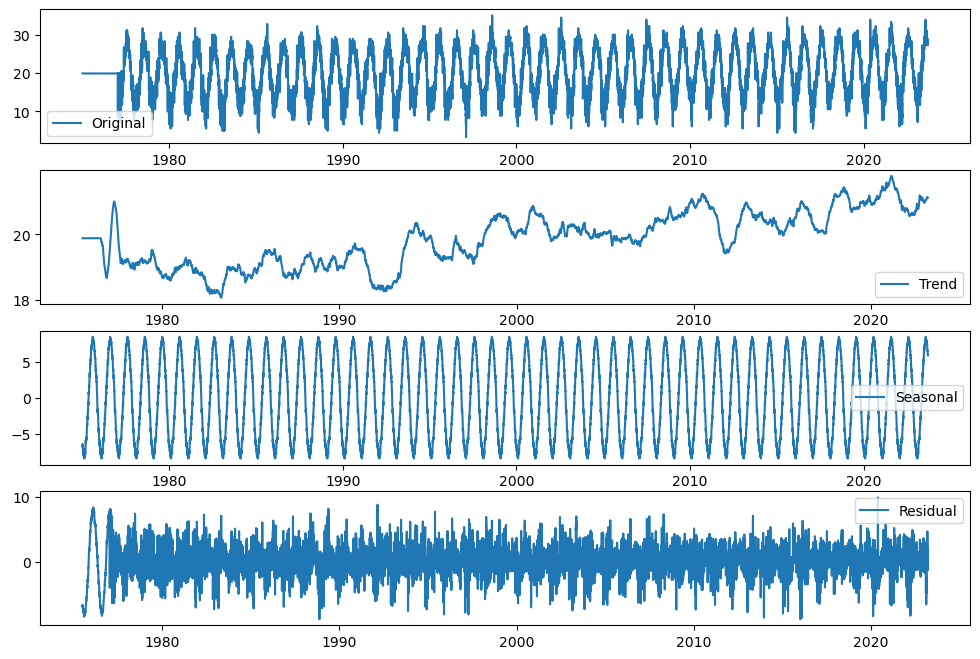

In [602]:
# Plot seasonality of the data

# Decompose the time-series with a frequency of 365 days
decomposition = seasonal_decompose(weather['TAVG'],period=365) # freq depends on the granularity of your data

# Plot each component
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.show()


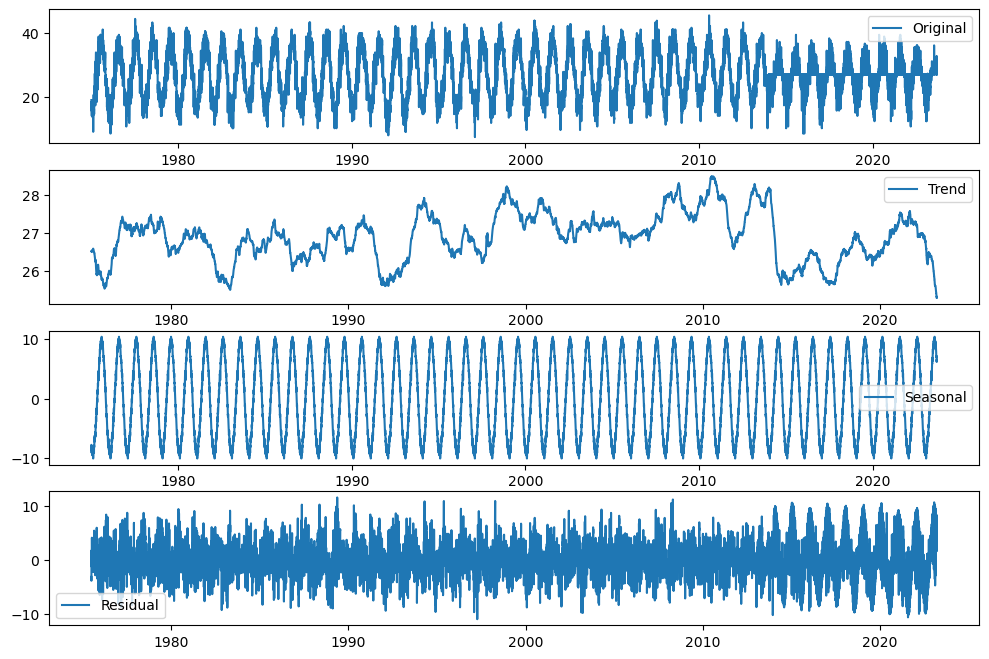

In [603]:
# Plot seasonality of the data

# Decompose the time-series with a frequency of 365 days
decomposition = seasonal_decompose(weather['TMAX'],period=365) # freq depends on the granularity of your data

# Plot each component
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.show()


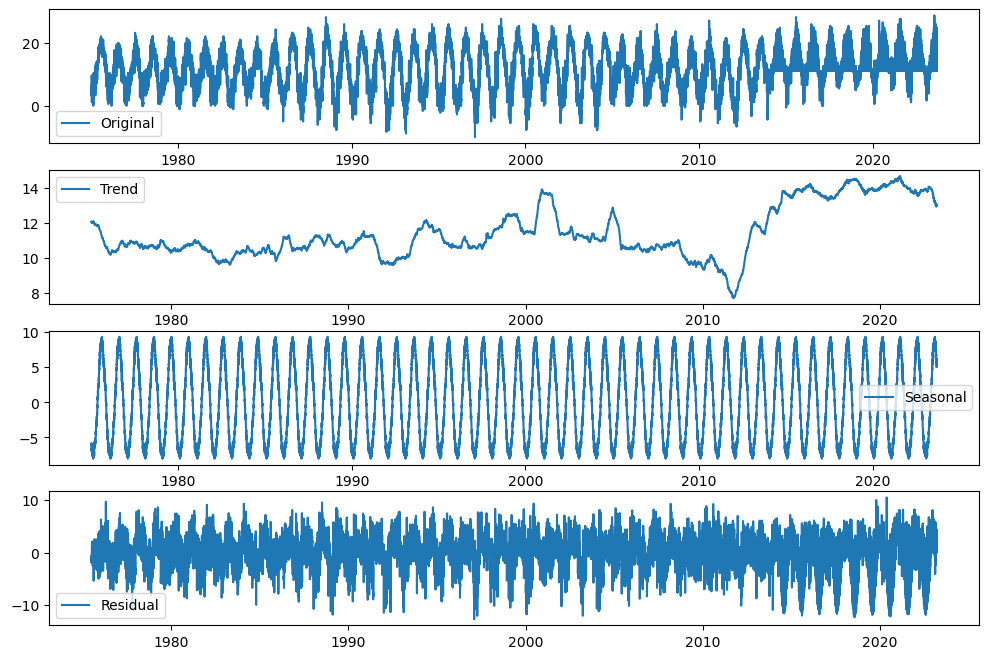

In [604]:
# Plot seasonality of the data

# Decompose the time-series with a frequency of 365 days
decomposition = seasonal_decompose(weather['TMIN'],period=365) # freq depends on the granularity of your data

# Plot each component
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.show()


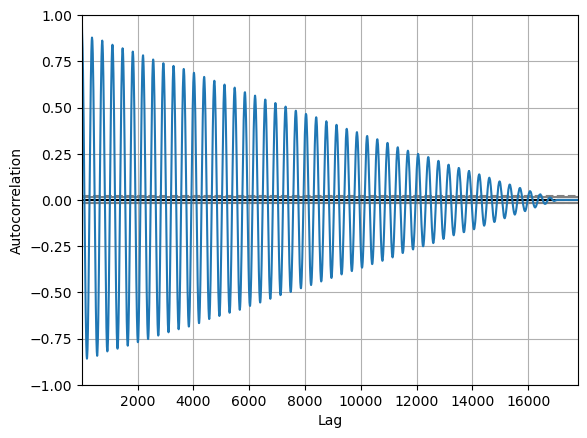

In [605]:
# Plot seasonality of the data
autocorrelation_plot(weather['TAVG'])
plt.show()


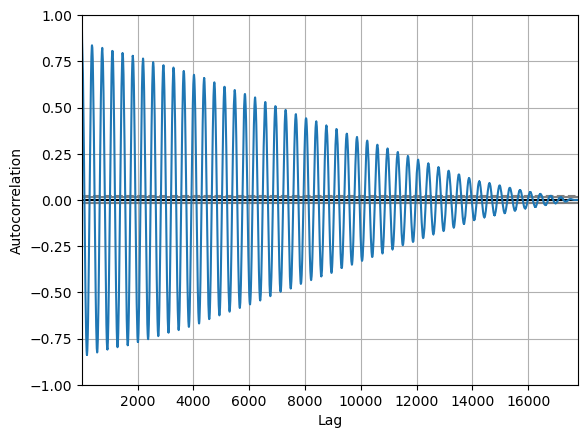

In [606]:
# Plot seasonality of the data
autocorrelation_plot(weather['TMAX'])
plt.show()

In [607]:
# Create lagged variables and rolling mean in the DataFrame to help with forecasting
core_weather = weather.iloc[:-1,:].copy()
core_weather["TMAX_lag1"] = core_weather['TMAX'].shift(1)
core_weather['TMAX_lag2'] = core_weather['TMAX'].shift(2)
core_weather['PRCP_lag1'] = core_weather['PRCP'].shift(1)
core_weather['TAVG_lag1'] = core_weather['TAVG'].shift(1)

window_size = 3  # Size of the rolling window
core_weather['TMAX_rolling_mean'] = core_weather['TMAX'].rolling(window=window_size).mean()

core_weather = core_weather.dropna()
core_weather.head()

PRCP       TAVG       TMAX      TMIN  TMAX_lag1  TMAX_lag2  \
DATE                                                                     
1975-01-04  0.05  19.885608  15.555556  7.222222  16.666667  18.888889   
1975-01-05  0.00  19.885608  16.666667  3.333333  15.555556  16.666667   
1975-01-06  0.02  19.885608  16.111111  5.555556  16.666667  15.555556   
1975-01-07  0.87  19.885608  18.333333  5.000000  16.111111  16.666667   
1975-01-08  4.96  19.885608  14.444444  4.444444  18.333333  16.111111   

            PRCP_lag1  TAVG_lag1  TMAX_rolling_mean  
DATE                                                 
1975-01-04       0.17  19.885608          17.037037  
1975-01-05       0.05  19.885608          16.296296  
1975-01-06       0.00  19.885608          16.111111  
1975-01-07       0.02  19.885608          17.037037  
1975-01-08       0.87  19.885608          16.296296

In [608]:
# Set the predictors which we will use to train the model
predictors = ["TMAX_lag1", "TMAX_rolling_mean", "PRCP_lag1", "TAVG_lag1"]

In [609]:
# Split train and test dataset. Create a separate validation dataset
train = core_weather.loc[:"2022-06-30"]
test = core_weather.loc["2022-07-01":"2022-12-31"]
validation = core_weather.loc["2023-01-01":"2023-06-30"]

In [610]:
# Define custom scorer for MAPE (assuming y_true and y_pred are numpy arrays)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Make it a scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Initialize the StandardScaler to scale the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training, test and validation data
train_scaled = scaler.fit_transform(train[predictors])
test_scaled = scaler.transform(test[predictors])
validation_scaled = scaler.transform(validation[predictors])

# TimeSeries Cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Grid Search to find the best parameters for the model
param_grid = {'alpha': np.logspace(-4, 4, 50)}
grid_search = GridSearchCV(Ridge(), param_grid, cv=tscv, scoring={'MSE': 'neg_mean_squared_error', 'MAPE': mape_scorer}, refit='MSE')

# Fit the model on the scaled data
grid_search.fit(train_scaled, train["TMAX"])

# Get the best alpha and best fitted model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Make predictions on the scaled test and validation sets
test_predictions = best_model.predict(test_scaled)
validation_predictions = best_model.predict(validation_scaled)

            Mean_Squared_Error
Test                  3.357939
Validation            4.517213


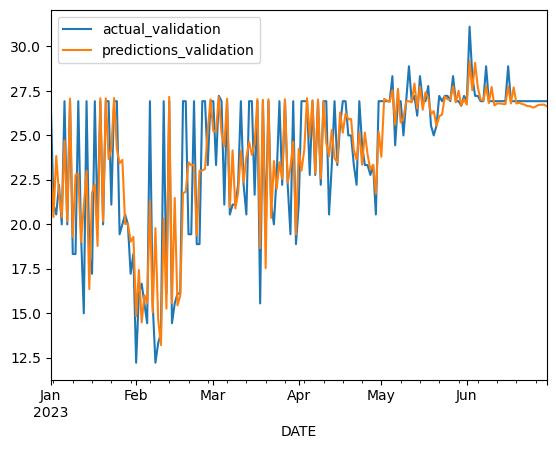

In [611]:
# Create DataFrames for test and validation results
test_combined = pd.DataFrame({
    'actual_test': test["TMAX"],
    'predictions_test': test_predictions
}, index=test.index)

validation_combined = pd.DataFrame({
    'actual_validation': validation["TMAX"],
    'predictions_validation': validation_predictions
}, index=validation.index)

# Calculate validation metrics
test_mse = mean_squared_error(test["TMAX"], test_predictions)
validation_mse = mean_squared_error(validation["TMAX"], validation_predictions)

# Add metrics to a new DataFrame
metrics_df = pd.DataFrame({
    'Mean_Squared_Error': [test_mse, validation_mse]
}, index=['Test', 'Validation'])

validation_combined.plot()
print(metrics_df)

In [612]:
# Check validation metrics for the forecasted values vs the validation dataset

actual_validation = validation_combined['actual_validation']
predictions_validation = validation_combined['predictions_validation']

# Remove any rows where either the actual or predicted values are NaN
filtered_validation = validation_combined.dropna(subset=['actual_validation', 'predictions_validation'])

actual_validation = filtered_validation['actual_validation']
predictions_validation = filtered_validation['predictions_validation']

# Mean Squared Error
mse_validation = mean_squared_error(actual_validation, predictions_validation)
print(f"Validation Mean Squared Error: {mse_validation}")

# Mean Absolute Percentage Error
mape_validation = np.mean(np.abs((actual_validation - predictions_validation) / actual_validation)) * 100
print(f"Validation Mean Absolute Percentage Error (MAPE): {mape_validation}")

# R-squared
r2_validation = r2_score(actual_validation, predictions_validation)
print(f"Validation R-squared: {r2_validation}")

# Mean Absolute Error
mae_validation = mean_absolute_error(actual_validation, predictions_validation)
print(f"Validation Mean Absolute Error (MAE): {mae_validation}")

Validation Mean Squared Error: 4.517213094064763
Validation Mean Absolute Percentage Error (MAPE): 6.583220395103904
Validation R-squared: 0.7333747737484376
Validation Mean Absolute Error (MAE): 1.4286661128391778


In [613]:
# Calculate error metrics for test dataset against test_predictions
mse = mean_squared_error(test["TMAX"], test_predictions)
mape = np.mean(np.abs((test["TMAX"] - test_predictions) / test["TMAX"])) * 100
r2 = r2_score(test["TMAX"], test_predictions)
mae = mean_absolute_error(test["TMAX"], test_predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error: 3.3579390483133666
Mean Absolute Percentage Error (MAPE): 4.577700566435193
R-squared: 0.8144468887292028
Mean Absolute Error (MAE): 1.288014591668748


In [614]:
# Create a DataFrame with the error metrics
metrics_data = {
    'Mean Squared Error': [mse],
    'Mean Absolute Percentage Error': [mape],
    'R-squared': [r2],
    'Mean Absolute Error': [mae]
}
metrics_df = pd.DataFrame(metrics_data)

metrics_df

Mean Squared Error  Mean Absolute Percentage Error  R-squared  \
0            3.357939                        4.577701   0.814447   

   Mean Absolute Error  
0             1.288015

In [615]:
# Combined DataFrame for actual and predictions
combined = pd.concat([test["TMAX"], pd.Series(test_predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

combined

actual  predictions
DATE                              
2022-07-01  32.222222    32.092071
2022-07-02  35.000000    33.496995
2022-07-03  32.222222    32.105679
2022-07-04  33.333333    34.034171
2022-07-05  34.444444    33.208661
...               ...          ...
2022-12-27  19.444444    20.051519
2022-12-28  20.555556    20.122429
2022-12-29  20.000000    19.855416
2022-12-30  20.000000    20.346435
2022-12-31  19.444444    19.784465

[184 rows x 2 columns]

<Axes: xlabel='DATE'>

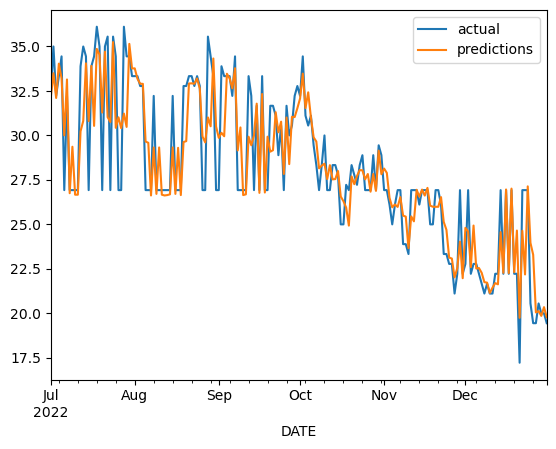

In [616]:
combined.plot()